In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def initialize_lattice(L):
    """Random spin configuration: +1 or -1"""
    return np.random.choice([-1, 1], size=(L, L))

def compute_energy(lattice):
    """Compute total energy of the lattice"""
    L = lattice.shape[0]
    energy = 0
    for i in range(L):
        for j in range(L):
            S = lattice[i, j]
            neighbors = lattice[(i+1)%L, j] + lattice[i, (j+1)%L] + \
                        lattice[(i-1)%L, j] + lattice[i, (j-1)%L]
            energy += -S * neighbors
    return energy / 2  # each pair counted twice

def compute_magnetization(lattice):
    return np.sum(lattice)

def metropolis_step(lattice, T):
    """Perform one Metropolis sweep (L^2 updates)"""
    L = lattice.shape[0]
    for _ in range(L * L):
        i = np.random.randint(0, L)
        j = np.random.randint(0, L)
        S = lattice[i, j]
        neighbors = lattice[(i+1)%L, j] + lattice[i, (j+1)%L] + \
                    lattice[(i-1)%L, j] + lattice[i, (j-1)%L]
        dE = 2 * S * neighbors
        if dE <= 0 or np.random.rand() < np.exp(-dE / T):
            lattice[i, j] *= -1
    return lattice

def simulate(L, T, steps, thermalization=0.1):
    lattice = initialize_lattice(L)
    energies, magnetizations = [], []

    therm_steps = int(steps * thermalization)

    for step in tqdm(range(steps)):
        lattice = metropolis_step(lattice, T)
        if step >= therm_steps:
            energy = compute_energy(lattice)
            magnet = compute_magnetization(lattice)
            energies.append(energy)
            magnetizations.append(abs(magnet))

    avg_E = np.mean(energies) / (L * L)
    avg_M = np.mean(magnetizations) / (L * L)
    C = (np.var(energies) / T**2) / (L * L)
    chi = (np.var(magnetizations) / T) / (L * L)

    print(f"Temperature: {T}")
    print(f"Average Energy per spin: {avg_E:.4f}")
    print(f"Average Magnetization per spin: {avg_M:.4f}")
    print(f"Specific Heat per spin: {C:.4f}")
    print(f"Susceptibility per spin: {chi:.4f}")

    return energies, magnetizations, lattice

def plot_observables(energies, magnetizations, L, T):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(energies, label='Energy')
    plt.xlabel('Step')
    plt.ylabel('Total Energy')
    plt.title(f'Energy Evolution (T={T})')

    plt.subplot(1, 2, 2)
    plt.plot(magnetizations, label='Magnetization', color='orange')
    plt.xlabel('Step')
    plt.ylabel('Total Magnetization')
    plt.title(f'Magnetization Evolution (T={T})')

    plt.tight_layout()
    plt.show()

def plot_lattice(lattice, T):
    plt.imshow(lattice, cmap='coolwarm', interpolation='nearest')
    plt.title(f"Final Lattice Configuration (T={T})")
    plt.colorbar(label='Spin')
    plt.show()


100%|██████████| 10000/10000 [05:17<00:00, 31.52it/s]


Temperature: 2.4
Average Energy per spin: -1.2050
Average Magnetization per spin: 0.2015
Specific Heat per spin: 1.1111
Susceptibility per spin: 18.3108


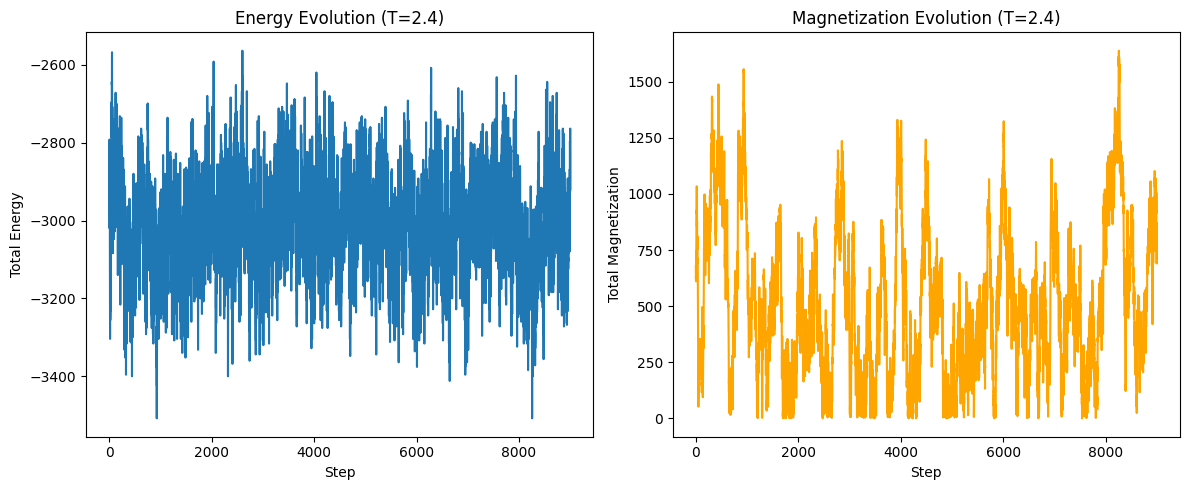

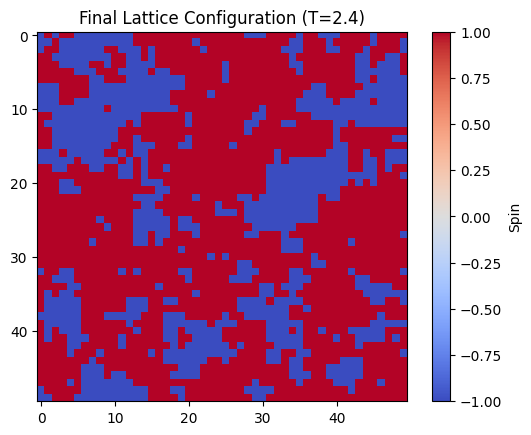

In [3]:
# Set simulation parameters
L = 50           # Lattice size (L x L)
T = 2.4          # Temperature
steps = 10000    # Number of Monte Carlo steps

# Run and visualize
energies, magnetizations, final_lattice = simulate(L, T, steps)
plot_observables(energies, magnetizations, L, T)
plot_lattice(final_lattice, T)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def initialize_lattice(L):
    return np.random.choice([-1, 1], size=(L, L))

def compute_energy(lattice):
    L = lattice.shape[0]
    energy = 0
    for i in range(L):
        for j in range(L):
            S = lattice[i, j]
            neighbors = lattice[(i+1)%L, j] + lattice[i, (j+1)%L] + \
                        lattice[(i-1)%L, j] + lattice[i, (j-1)%L]
            energy += -S * neighbors
    return energy / 2  # avoid double counting

def compute_magnetization(lattice):
    return np.sum(lattice)

def metropolis_step(lattice, T):
    L = lattice.shape[0]
    for _ in range(L * L):
        i, j = np.random.randint(0, L, size=2)
        S = lattice[i, j]
        neighbors = lattice[(i+1)%L, j] + lattice[i, (j+1)%L] + \
                    lattice[(i-1)%L, j] + lattice[i, (j-1)%L]
        dE = 2 * S * neighbors
        if dE <= 0 or np.random.rand() < np.exp(-dE / T):
            lattice[i, j] *= -1
    return lattice

def simulate(L, T, steps, thermalization=0.1):
    lattice = initialize_lattice(L)
    energies, magnetizations = [], []
    therm_steps = int(steps * thermalization)

    for step in range(steps):
        lattice = metropolis_step(lattice, T)
        if step >= therm_steps:
            energy = compute_energy(lattice)
            magnet = compute_magnetization(lattice)
            energies.append(energy)
            magnetizations.append(abs(magnet))

    norm = L * L
    avg_E = np.mean(energies) / norm
    avg_M = np.mean(magnetizations) / norm
    C = (np.var(energies) / T**2) / norm
    chi = (np.var(magnetizations) / T) / norm

    return avg_E, avg_M, C, chi

def run_temperature_sweep(L=20, steps=5000, Tmin=1.5, Tmax=3.5, Tsteps=20):
    T_values = np.linspace(Tmin, Tmax, Tsteps)
    E_vals, M_vals, C_vals, X_vals = [], [], [], []

    print("Running temperature sweep:")
    for T in tqdm(T_values):
        avg_E, avg_M, C, chi = simulate(L, T, steps)
        E_vals.append(avg_E)
        M_vals.append(avg_M)
        C_vals.append(C)
        X_vals.append(chi)

    return T_values, E_vals, M_vals, C_vals, X_vals

def plot_vs_temperature(T, E, M, C, X):
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.plot(T, E, 'o')
    plt.title('Average Energy per Spin')
    plt.xlabel('Temperature')
    plt.ylabel('Energy')

    plt.subplot(2, 2, 2)
    plt.plot(T, M, 'o')
    plt.title('Average Magnetization per Spin')
    plt.xlabel('Temperature')
    plt.ylabel('Magnetization')

    plt.subplot(2, 2, 3)
    plt.plot(T, C, 'o')
    plt.title('Specific Heat per Spin')
    plt.xlabel('Temperature')
    plt.ylabel('C')

    plt.subplot(2, 2, 4)
    plt.plot(T, X, 'o')
    plt.title('Susceptibility per Spin')
    plt.xlabel('Temperature')
    plt.ylabel('χ')

    plt.tight_layout()
    plt.show()


Running temperature sweep:


100%|██████████| 20/20 [03:38<00:00, 10.91s/it]


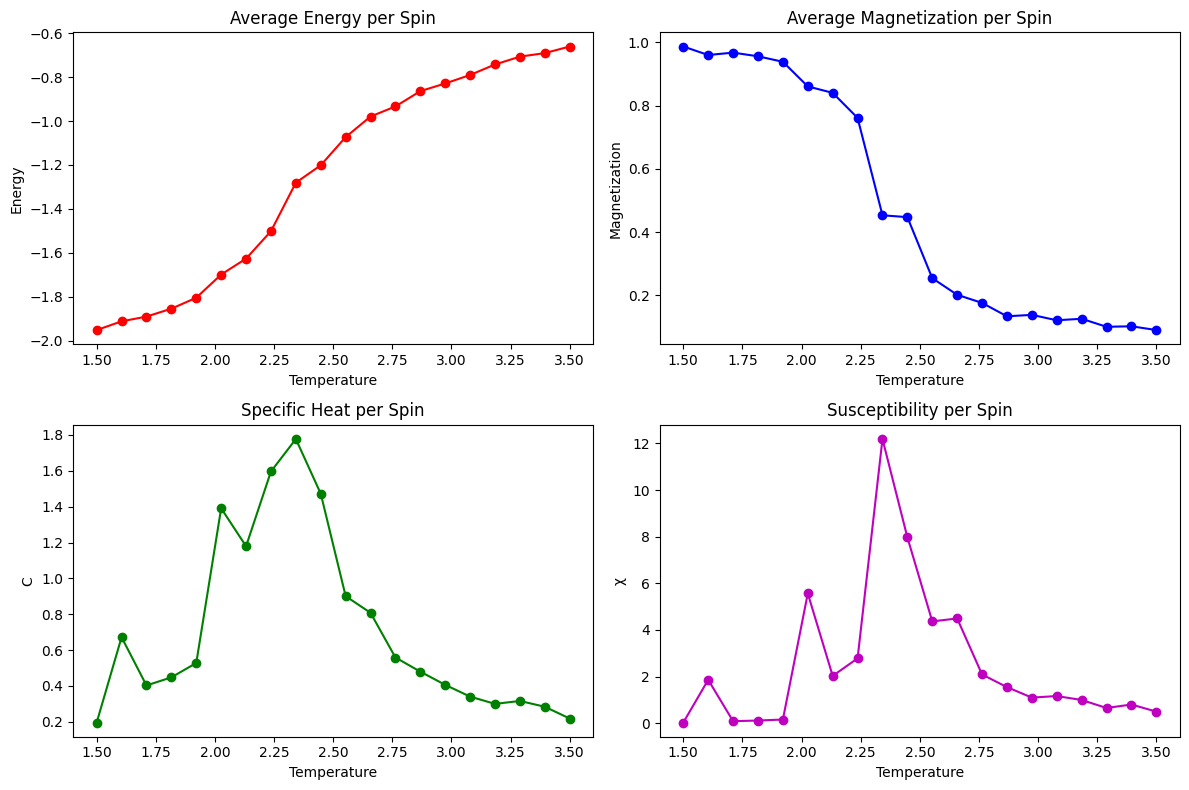

In [7]:
L = 20          # Lattice size (L x L)
steps = 1000    # Steps per temperature
Tmin = 1.5
Tmax = 3.5
Tsteps = 20     # Number of temperature points

T, E, M, C, X = run_temperature_sweep(L, steps, Tmin, Tmax, Tsteps)
plot_vs_temperature(T, E, M, C, X)
